In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
np.random.seed(2)

In [2]:
def normalize_df(_df):
    return _df / _df.values.max(axis=1).reshape(-1, 1)

df = pd.read_csv("bag_of_words.csv").drop('Unnamed: 0', axis=1)
df = normalize_df(df)
df.head()

,financial,controller,hacer,mejores,agencias,marketing,digital,profesional,alguno,carrera,...,diciones,typecontrato,hojos,afinesdebe,microcrodito,atencionia,fuercia,culturalconocimiento,investigaciondisponibilidad,crecimientopersonal
0,0.5,0.5,0.5,0.5,0.5,0.500000,0.5,1.0,0.5,0.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.090909,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.090909,0.0,0.0,0.0,0.090909,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
for n_comp in [10,20,30,40,50]:
    model_pca = PCA(n_components=n_comp)
    data_pca = model_pca.fit_transform(df)
    print(f"# componentes {n_comp}\t{sum(model_pca.explained_variance_ratio_)}")

# componentes 10	0.1790387562715988
# componentes 20	0.27992946529956975
# componentes 30	0.3587419416743344
# componentes 40	0.4229112933820422
# componentes 50	0.47574694145066354


In [4]:
for n_comp in [60,80,100,120,140]:
    model_pca = PCA(n_components=n_comp)
    data_pca = model_pca.fit_transform(df)
    print(f"# componentes {n_comp}\t{sum(model_pca.explained_variance_ratio_)}")

# componentes 60	0.5244048076851552
# componentes 80	0.6054887011756166
# componentes 100	0.6705187656533788
# componentes 120	0.7239052413053441
# componentes 140	0.7688458585052889


In [5]:
for n_comp in [160,200,240,280,320]:
    model_pca = PCA(n_components=n_comp)
    data_pca = model_pca.fit_transform(df)
    print(f"# componentes {n_comp}\t{sum(model_pca.explained_variance_ratio_)}")

# componentes 160	0.8067983357288031
# componentes 200	0.8675931030381479
# componentes 240	0.9136060139822498
# componentes 280	0.9481744410356284
# componentes 320	0.972951620543337


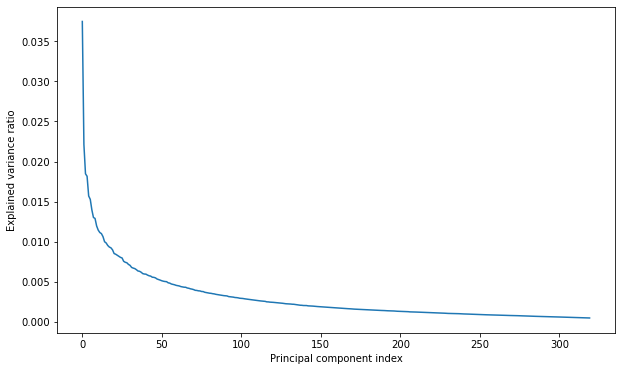

In [6]:
model_pca = PCA(n_components=320)
data_pca = model_pca.fit_transform(df)

plt.figure(figsize=(10,6))
plt.plot(model_pca.explained_variance_ratio_)
plt.xlabel('Principal component index')
plt.ylabel('Explained variance ratio')
plt.show()

In [7]:
model_pca = PCA(n_components=200)
data_pca = model_pca.fit_transform(df)
sum(model_pca.explained_variance_ratio_)

0.867640407347368

In [8]:
data_tsne_list = []
for perp in range(5, 55, 5):
    model_tsne = TSNE(random_state=0, verbose=0, perplexity=perp)
    data_tsne = model_tsne.fit_transform(data_pca)
    data_tsne_list.append({"perp": perp, "tsne": data_tsne})

len(data_tsne_list)

10

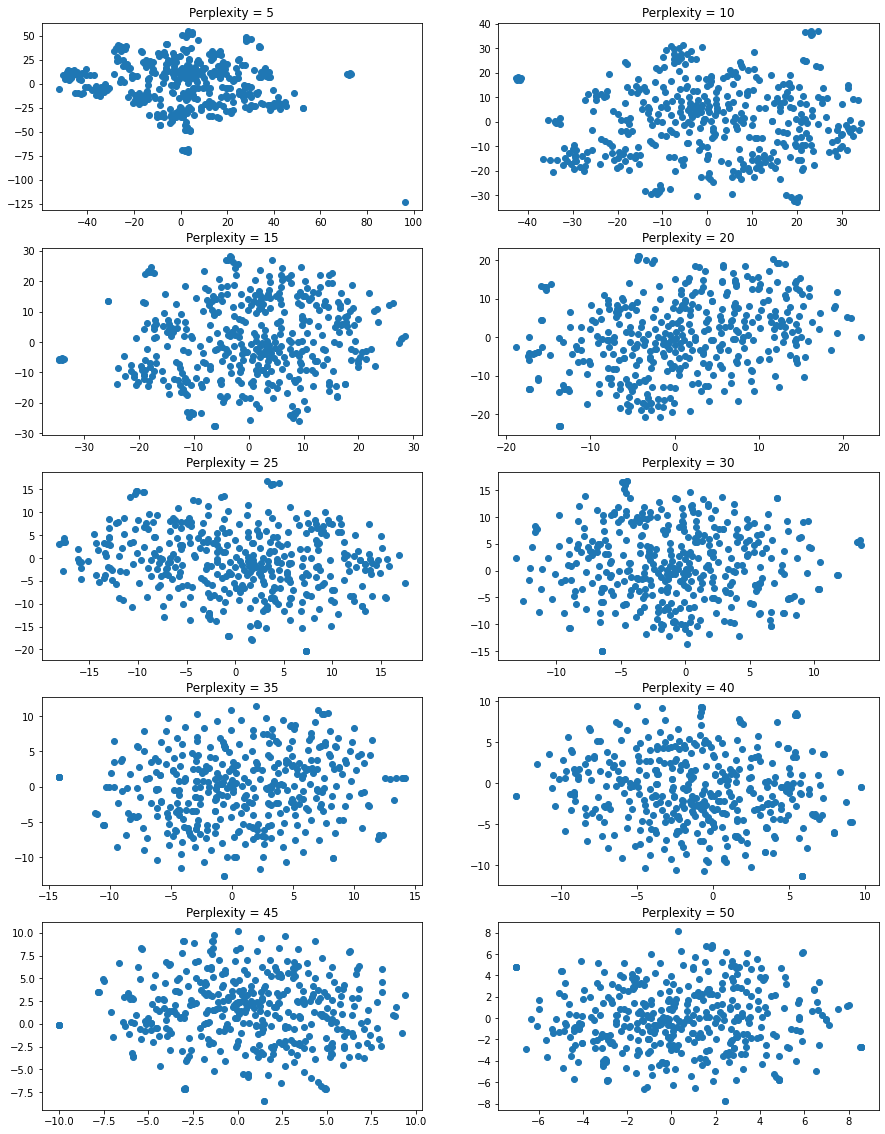

In [9]:
fig, axs = plt.subplots(5, 2, figsize=(15,20))
idx = 0
for i in range(0,5):
    for j in range(0,2):
        data = data_tsne_list[idx]; idx+=1
        axs[i, j].scatter(data["tsne"][:,0], data["tsne"][:,1])
        axs[i, j].set_title(f'Perplexity = {data["perp"]}')

# PCA Clustering

In [18]:
X = pd.DataFrame(data_pca)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421 entries, 0 to 420
Columns: 200 entries, 0 to 199
dtypes: float64(200)
memory usage: 657.9 KB


In [21]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0,421.0,4.821295e-16,0.510160,-0.959460,-0.402172,-0.080544,0.326681,1.893593
1,421.0,3.177717e-17,0.392031,-1.183532,-0.224253,-0.063414,0.222008,1.331194
2,421.0,3.270016e-17,0.358134,-0.854568,-0.223808,-0.066398,0.172694,1.496799
3,421.0,1.425028e-16,0.355079,-1.223020,-0.203891,-0.018454,0.179570,1.324239
4,421.0,8.137027e-17,0.330198,-1.076983,-0.191643,0.034522,0.203057,1.215654
...,...,...,...,...,...,...,...,...
195,421.0,2.030574e-17,0.094436,-0.276645,-0.054905,-0.000186,0.046101,0.378668
196,421.0,1.491615e-17,0.093373,-0.404115,-0.055685,0.000823,0.049117,0.417437
197,421.0,2.366806e-17,0.093076,-0.280603,-0.049406,0.000427,0.056951,0.306560
198,421.0,3.428242e-17,0.092140,-0.430995,-0.044488,-0.000392,0.042981,0.435207


Text(0, 0.5, 'Squere sum of cluster')

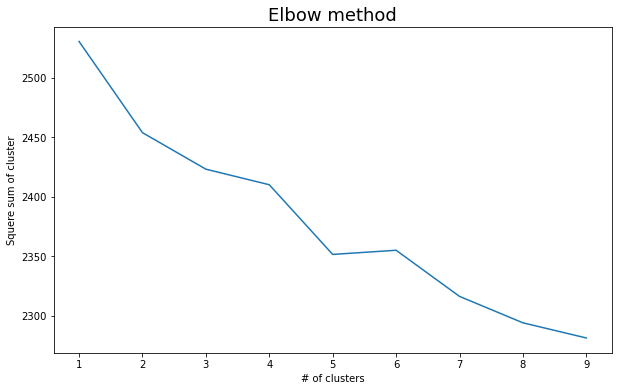

In [22]:
range_values = range(1,10)
sum_squares = []
silhouette_coefs = []

for i in range_values:
    kmeans = KMeans(i)
    kmeans.fit(X)
    sum_squares.append(kmeans.inertia_)
    labels = kmeans.labels_
    if i > 1: silhouette_coefs.append(silhouette_score(X, labels, metric='euclidean'))
    else: silhouette_coefs.append(0)

plt.figure(figsize=(10,6))
plt.plot(range_values, sum_squares)
plt.title('Elbow method',{'fontsize':18})
plt.xlabel('# of clusters')
plt.ylabel('Squere sum of cluster')

Text(0, 0.5, 'Silhouette coef of cluster')

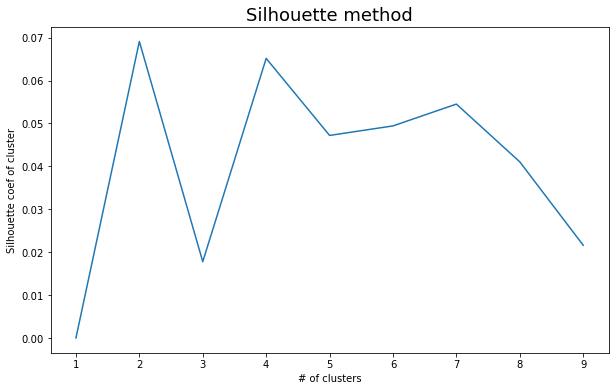

In [15]:
plt.figure(figsize=(10,6))
plt.plot(range_values, silhouette_coefs)
plt.title('Silhouette method',{'fontsize':18})
plt.xlabel('# of clusters')
plt.ylabel('Silhouette coef of cluster')

# T-SNE Clustering

In [19]:
model_tsne = TSNE(random_state=0, verbose=0, perplexity=10)
data_tsne = model_tsne.fit_transform(data_pca)
X_tsne = pd.DataFrame(data_tsne)
X_tsne.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421 entries, 0 to 420
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       421 non-null    float32
 1   1       421 non-null    float32
dtypes: float32(2)
memory usage: 3.4 KB


In [20]:
X_tsne.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0,421.0,0.280468,17.947355,-42.764900,-12.347264,0.161481,15.488213,34.421692
1,421.0,0.316262,15.158188,-32.524239,-12.171237,0.452069,11.061959,36.989517


Text(0, 0.5, 'Squere sum of cluster')

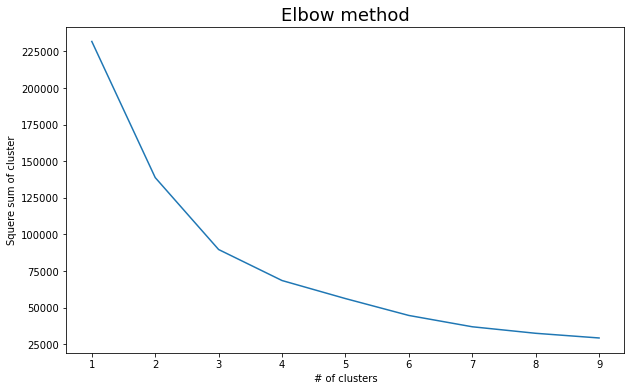

In [27]:
range_values = range(1,10)
sum_squares = []
silhouette_coefs = []

for i in range_values:
    kmeans = KMeans(i)
    kmeans.fit(X_tsne)
    sum_squares.append(kmeans.inertia_)
    labels = kmeans.labels_
    if i > 1: silhouette_coefs.append(silhouette_score(X_tsne, labels, metric='euclidean'))
    else: silhouette_coefs.append(0)

plt.figure(figsize=(10,6))
plt.plot(range_values, sum_squares)
plt.title('Elbow method',{'fontsize':18})
plt.xlabel('# of clusters')
plt.ylabel('Squere sum of cluster')

Text(0, 0.5, 'Silhouette coef of cluster')

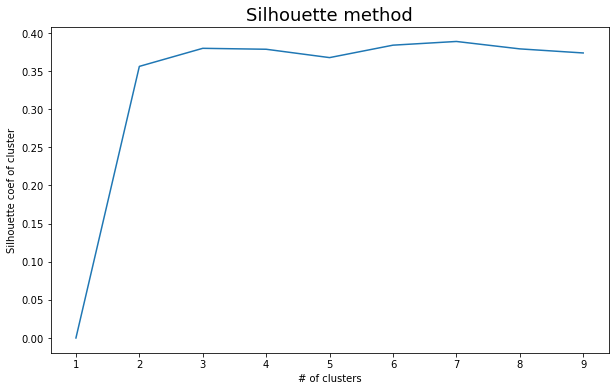

In [28]:
plt.figure(figsize=(10,6))
plt.plot(range_values, silhouette_coefs)
plt.title('Silhouette method',{'fontsize':18})
plt.xlabel('# of clusters')
plt.ylabel('Silhouette coef of cluster')